1. what is outlier
2. cause of outlier
3. Detection of outlier
4. removing the outlier
5. outlier effect on machine learning algorithm


### What is a outlier?
Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

### Types of Outlier

Outliers can be of two kinds: 
- univariate : Univariate outliers can be found when looking at a distribution of values in a single feature space
- multivariate : Multivariate outliers can be found in a n-dimensional space (of n-features). Looking at distributions in n-dimensional spaces can be very difficult for the human brain, that is why we need to train a model to do it for us.


### Outliers can also come in different flavours, depending on the environment:

- point outliers: Point outliers are single data points that lay far from the rest of the distribution.

- contextual outliers:  Contextual outliers can be noise in data, such as punctuation symbols when realizing text analysis or background noise signal when doing speech recognition.

- collective outliers: Collective outliers can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena (As in figure B).

 

### Most common causes of outliers on a data set:
- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data)

### Detetcton of Outlier
#### Some of the most popular methods for outlier detection are:
    
- Z-Score or Extreme Value Analysis (parametric)

- Probabilistic and Statistical Modeling (parametric)

- Linear Regression Models (PCA, LMS)

- Proximity Based Models (non-parametric)

- Information Theory Models

- High Dimensional Outlier Detection Methods (high dimensional sparse data)

### Removing The Outlier

- Z-score treatment

- IQR based filtering

- Percentile

### Different Algorithm for outlier detection(Automatic Outlier Detection)

- Isolation Forest
- Minimum Covariance Determinant
- Local Outlier Factor
- One-Class SVM

### Outlier effect on Machine Learing Algorithm

- Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier---------Not Sensitive To Outliers
2. SVM-----------------------------Not Sensitive To Outliers          
3. Linear Regression---------------Sensitive To Outliers
4. Logistic Regression-------------Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

##### IQR-based detection general method

https://towardsdatascience.com/two-outlier-detection-techniques-you-should-know-in-2021-1454bef89331

An IQR-based detection is a statistical approach. This technique is applied for individual features, not for whole observations as in the Elliptic envelope. The intuition behind IQR-based detection is also very simple. First, we calculate the first quartile (Q1) and third quartile (Q3) of the data. Then we get the difference between those quartiles. That difference is called the IQR (InterQuartile Range).

IQR = Q3-Q1

Lower bound = Q1–1.5(IQR)

Upper bound = Q3+1.5(IQR)

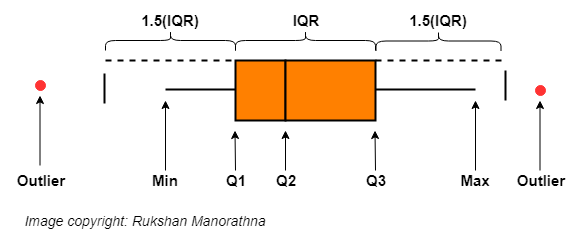

### Outlier detection Methods
Lets dive into Outlier detection methods

### 1. Z-Score or Extreme Value Analysis (parametric)

Source: https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution.



 This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.

After making the appropriate transformations to the selected feature space of the dataset, the z-score of any data point can be calculated with the following expression:

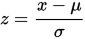

When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.

In [157]:
# import numpy
import numpy as np

# random data points to calculate z-score

data = [4, 6, 7, -100, 5, 8, 6, 5, 4, 5, 99, 98, 6, 7, 5]

# calculate mean
mean = np.mean(data) 

# calculate standard deviation
sd = np.std(data)

# determine a threhold means beyond how many standard deviation
threshold = 2

# create empty list to store outliers
outliers = []

# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [-100, 99, 98]


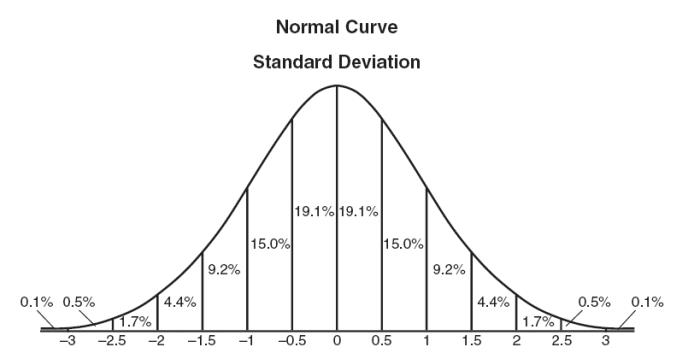

By ‘tagging’ or removing the data points that lay beyond a given threshold we are classifying data into outliers.  For nonparametric problems Dbscan and Isolation Forests can be good solutions

**Z-Score pros:**
It is a very effective method if you can describe the values in the feature space with a gaussian distribution. (Parametric)
The implementation is very easy using pandas and scipy.stats libraries.

:**Z-Score cons::**
It is only convenient to use in a low dimensional feature space, in a small to medium sized dataset.
Is not recommended when distributions can not be assumed to be parametric.

### 2. DBSCAN Algorithm for Fraud Detection & Outlier Detection in a Data set

Source: https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8

The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: ***epsilon*** and ***minPoints***. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into ***Core point***, ***Border point***, and ***Noise***. **A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points*. *If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise**.


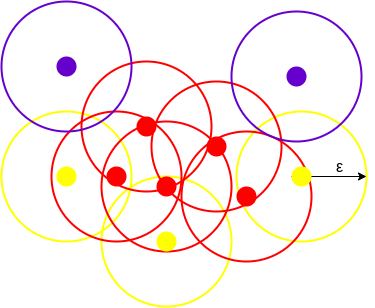

The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.

All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color. 

All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color. 

Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.

For locating data points in space, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

**Dbscan pros:**

It is a super effective method when the distribution of values in the feature space can not be assumed.
Works well if the feature space for searching outliers is multidimensional (ie. 3 or more dimensions)
Sci-kit learn’s implementation is easy to use and the documentation is superb.
Visualizing the results is easy and the method itself is very intuitive.

**Dbscan cons:**
The values in the feature space need to be scaled accordingly.
Selecting the optimal parameters eps, MinPts and metric can be difficult since it is very sensitive to any of the three params.
It is an unsupervised model and needs to be re-calibrated each time a new batch of data is analyzed.
It can predict once calibrated but is strongly not recommended.

Source for coding: https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8

In [98]:
# data wrangling
import pandas as pd# visualization
import matplotlib.pyplot as plt# algorithm
from sklearn.cluster import DBSCAN

In [72]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [77]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[["sepal_length", "sepal_width"]])

DBSCAN()

In [81]:
model

DBSCAN(eps=3, min_samples=4)

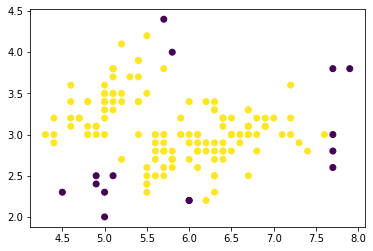

In [90]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [94]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(df[["sepal_length", "sepal_width"]])
distances, indices = nbrs.kneighbors(df[["sepal_length", "sepal_width"]])

In [95]:
distances

array([[0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.2       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.2236068 ],
       [0.        , 0.28284271],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.2236068 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.2       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.        , 0.1       ],
       [0.        , 0.1       ],
       [0.        , 0.        ],
       [0.

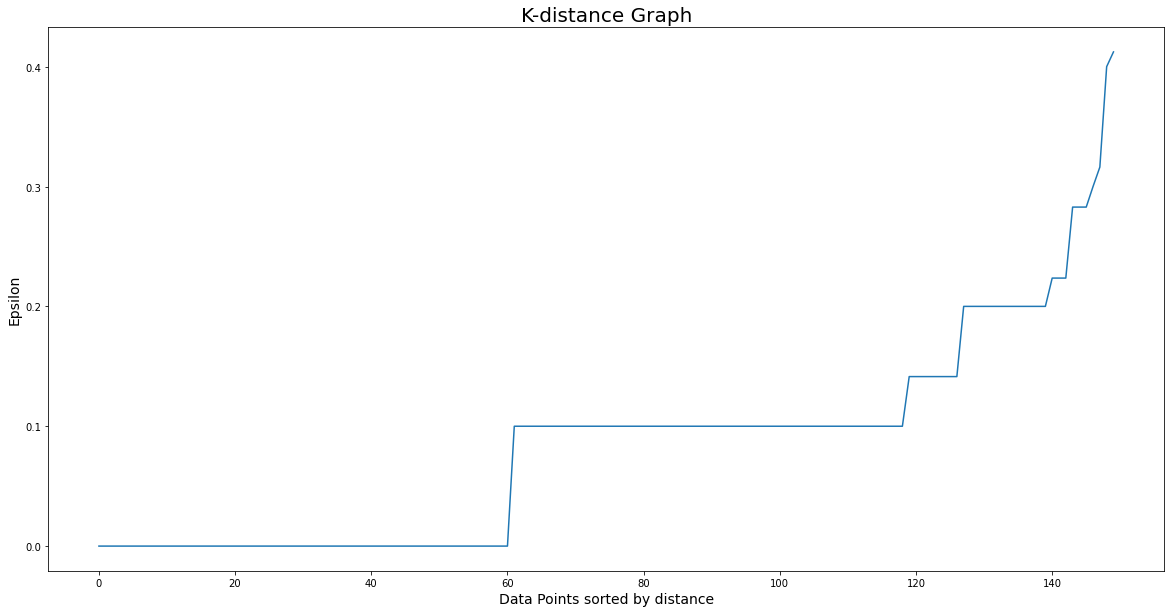

In [84]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [85]:
# input data
data = df[["sepal_length", "sepal_width"]]# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0 is a good cluster, and -1 is the noise. Let’s plot the results and see what we get.

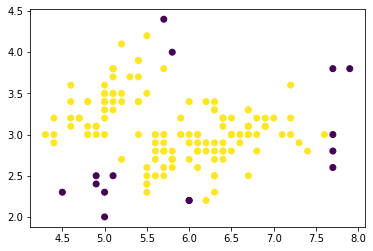

In [86]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [93]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

     sepal_length  sepal_width
14            5.8          4.0
15            5.7          4.4
41            4.5          2.3
57            4.9          2.4
60            5.0          2.0
62            6.0          2.2
93            5.0          2.3
98            5.1          2.5
106           4.9          2.5
117           7.7          3.8
118           7.7          2.6
119           6.0          2.2
122           7.7          2.8
131           7.9          3.8
135           7.7          3.0


### 3. Local Outlier Factor (LOF) Algorithm

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier
detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers. The scikit-learn library provides an implementation of this approach in the LocalOutlierFactor class. 


We can demonstrate the LocalOutlierFactor method on a predictive modeling dataset. We will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices. You can learn more about the dataset here:

It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric. In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the training dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).
The complete example of evaluating a linear regression model on the dataset is listed below.

In [163]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [165]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [167]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [169]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


Firstly, we can see that the number of examples in the training dataset has been reduced from 339 to 305, meaning 34 rows containing outliers were identified and deleted. We can also see a reduction in MAE from about 3.417 by a model fit on the entire training dataset, to about 3.356 on a model fit on the dataset with outliers removed

### 4.Standard Deviation Method

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample. For example, within one standard deviation
of the mean will cover 68 percent of the data. So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68 percent of the data sample.


1 Standard Deviation from the Mean: 68 percent.

2 Standard Deviations from the Mean: 95 percent.

3 Standard Deviations from the Mean: 99.7 percent.

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples. Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95 percent) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9 percent) can be used.

In [136]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


In [137]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [142]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


In [143]:
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


### 5. Interquartile Range Method

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. Recall that percentiles can be calculated by sorting the observations and selecting values at specific indices.
The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. 

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots. On a box
and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots. We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between
the 75th and 25th percentiles.

In [146]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919
